In [1]:
import pandas as pd
import numpy as np

from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

In [ ]:
!pip install statsmodels

In [2]:
dataset = pd.read_csv("developer_productivity_dataset.csv")

In [3]:
dataset

,Developer_ID,Week_Number,Experience_Years,Role_Level,Programming_Language,Remote_Work,Hours_Worked,Tasks_Completed,Code_Review_Score,Project_Familiarity_Percent,Collaboration_Score,Meetings_Attended,Productivity_Score
0,D0039,15,4.2,Senior,C++,False,52.8,7,7.4,52,5.2,1,56.999528
1,D0029,32,4.8,Junior,C++,False,34.5,15,8.1,61,7.2,9,77.129808
2,D0015,32,5.2,Mid,Python,True,46.9,19,6.6,58,4.6,4,74.278398
3,D0043,24,12.8,Junior,JavaScript,True,26.7,10,7.4,73,6.7,3,66.969578
4,D0008,41,2.5,Senior,JavaScript,False,29.6,15,8.7,53,8.5,7,83.842350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,D0037,32,8.8,Junior,JavaScript,False,35.2,16,5.4,44,4.7,9,65.830453
196,D0033,47,11.2,Senior,Java,True,35.8,13,9.8,52,7.7,3,79.383883
197,D0042,22,11.6,Senior,C++,True,40.0,14,8.3,68,8.6,6,73.092362
198,D0044,23,12.4,Senior,Go,True,43.5,14,6.9,70,7.9,6,76.407934


### 1. What kind of relation between Code_Review_Score and Collaboration_Score?

In [4]:
correlation = dataset[['Code_Review_Score', 'Productivity_Score']].corr()
print(correlation)

                    Code_Review_Score  Productivity_Score
Code_Review_Score            1.000000            0.289582
Productivity_Score           0.289582            1.000000


##### Correlation between Code_Review_Score and Productivity_Score is 0.28. Hence, it is a low degree of positive correlation (Directly propotional but only 28%)

### 2. Convert normal distribution to standard normal distribution for Code_Review_Score

##### Normal Distribution

C:\Anaconda\envs\mlai\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


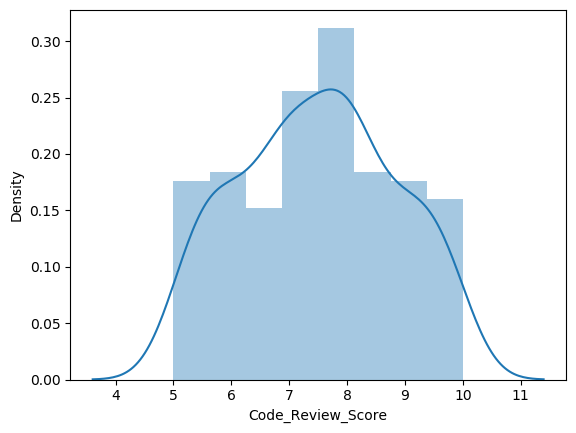

In [5]:
sns.distplot(dataset["Code_Review_Score"])

##### Standard Normal Distribution

In [6]:
def stdNBgraph(dataset):
    # Coverted to standard Normal Distribution
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)

C:\Anaconda\envs\mlai\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


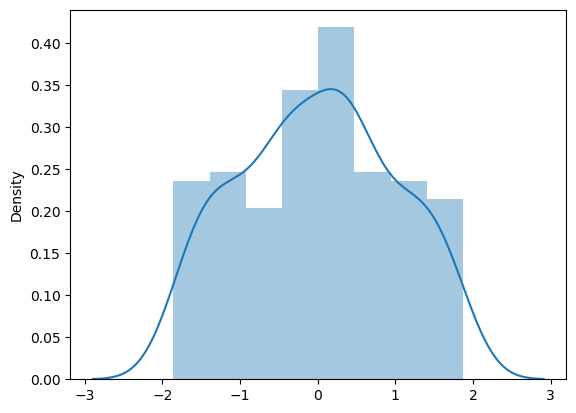

In [7]:
stdNBgraph(dataset["Code_Review_Score"])

### PROBABILITY DENSITY FUNCTION

### 3. What is the probability Density Function of the Productivity_Score range from 60 to 80

In [8]:
def get_pdf_probability(dataset,startrange,endrange):
    
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color="Green")
    #To plot vertical line
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    
    #generate a sample
    sample=dataset
    
    #calculate mean and std deviation
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    
    # define the normal distribution
    dist = norm(sample_mean, sample_std)
    
    #Sample propability for a range of outcomes
    values=[value for value in range(startrange,endrange)]
    
    #To calculate pdf
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,prob))
    return prob

Mean=70.665, Standard Deviation=12.122
The area between range(60,80):0.5885708710450058


C:\Anaconda\envs\mlai\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


0.5885708710450058

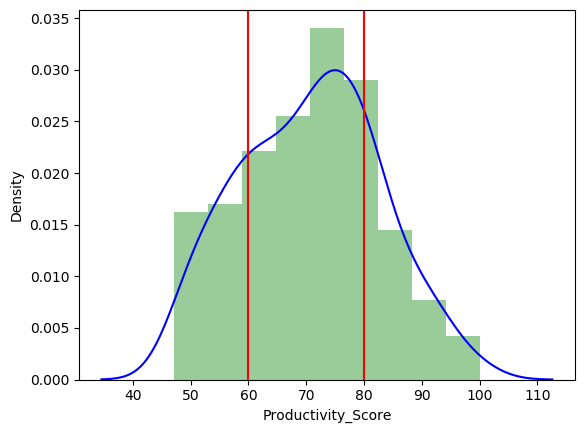

In [9]:
get_pdf_probability(dataset["Productivity_Score"],60,80)

## BIVARIATE ANALYSIS

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
Developer_ID                   200 non-null object
Week_Number                    200 non-null int64
Experience_Years               200 non-null float64
Role_Level                     200 non-null object
Programming_Language           200 non-null object
Remote_Work                    200 non-null bool
Hours_Worked                   200 non-null float64
Tasks_Completed                200 non-null int64
Code_Review_Score              200 non-null float64
Project_Familiarity_Percent    200 non-null int64
Collaboration_Score            200 non-null float64
Meetings_Attended              200 non-null int64
Productivity_Score             200 non-null float64
dtypes: bool(1), float64(5), int64(4), object(3)
memory usage: 19.1+ KB


In [11]:
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

# Now compute the covariance matrix
cov_matrix = numeric_dataset.cov()
print(cov_matrix)

                             Week_Number  Experience_Years  Hours_Worked  \
Week_Number                   227.047136          1.241176     -1.930910   
Experience_Years                1.241176         17.497498     -0.500660   
Hours_Worked                   -1.930910         -0.500660     27.370422   
Tasks_Completed                 0.557186          1.377106     -0.549377   
Code_Review_Score               2.778111          0.301292     -0.641954   
Project_Familiarity_Percent   -20.998693         -0.544030     -3.793101   
Collaboration_Score             1.646030         -0.095286     -1.460186   
Meetings_Attended               4.231407          0.070930      1.532299   
Productivity_Score              3.172364          3.322655     -7.444691   

                             Tasks_Completed  Code_Review_Score  \
Week_Number                         0.557186           2.778111   
Experience_Years                    1.377106           0.301292   
Hours_Worked                       -0.

In [12]:
dataset.corr()

,Week_Number,Experience_Years,Remote_Work,Hours_Worked,Tasks_Completed,Code_Review_Score,Project_Familiarity_Percent,Collaboration_Score,Meetings_Attended,Productivity_Score
Week_Number,1.000000,0.019692,-0.075236,-0.024494,0.007586,0.137409,-0.081117,0.061385,0.100625,0.017368
Experience_Years,0.019692,1.000000,0.124458,-0.022878,0.067535,0.053681,-0.007570,-0.012800,0.006076,0.065528
Remote_Work,-0.075236,0.124458,1.000000,-0.045188,0.064535,0.002728,0.051259,0.086242,-0.070995,0.146141
Hours_Worked,-0.024494,-0.022878,-0.045188,1.000000,-0.021542,-0.091450,-0.042202,-0.156837,0.104950,-0.117390
Tasks_Completed,0.007586,0.067535,0.064535,-0.021542,1.000000,-0.000965,-0.180923,-0.064495,0.007129,0.738095
Code_Review_Score,0.137409,0.053681,0.002728,-0.091450,-0.000965,1.000000,-0.110156,0.047053,-0.041816,0.289582
Project_Familiarity_Percent,-0.081117,-0.007570,0.051259,-0.042202,-0.180923,-0.110156,1.000000,0.044480,-0.095078,0.191652
Collaboration_Score,0.061385,-0.012800,0.086242,-0.156837,-0.064495,0.047053,0.044480,1.000000,0.000860,0.245317
Meetings_Attended,0.100625,0.006076,-0.070995,0.104950,0.007129,-0.041816,-0.095078,0.000860,1.000000,-0.173442
Productivity_Score,0.017368,0.065528,0.146141,-0.117390,0.738095,0.289582,0.191652,0.245317,-0.173442,1.000000


### 4. What kind of relation between Project_Familiarity_Percent & Productivity_Score?

In [14]:
correlation = dataset['Project_Familiarity_Percent'].corr(dataset['Productivity_Score'])
print("Correlation is",correlation)

Correlation is 0.19165228601145298


##### Correlation between Project_Familiarity_Percent and Productivity_Score is 0.19. Hence, it is a weak positive correlation (Directly propotional but 0nly 19%, the relation is not strong)

### 5. Which Programming_Language is getting the minimum Productivity_Score?

In [15]:
min_score = dataset['Productivity_Score'].min()

# Find all rows with that minimum salary
min_score_rows = dataset[dataset['Productivity_Score'] == min_score]

# Get unique specializations from those rows
prog_lang = min_score_rows['Programming_Language'].unique()

print(f"Minimum productivity score is: {min_score}")
#print("Minimum salary is:", min_salary)
#print("Minimum salary is: " + str(min_salary)) 

print("programming language(s) has Minimum productivity score:")

for lang in prog_lang:
    print(f"- {lang}")

Minimum productivity score is: 47.184336947710754
programming language(s) has Minimum productivity score:
- Java


### 6. How many of them getting above 90 Productivity_Score?

In [16]:
max_Productivity_Score = dataset[dataset['Productivity_Score'] > 90]
print(len(max_Productivity_Score) , "of them were getting Productivity_Score of above 90")

11 of them were getting Productivity_Score of above 90


### MULTICOLLINEARITY

In [17]:
# Select only numeric features for VIF
X = dataset.select_dtypes(include=['float64', 'int64'])
#X = add_constant(X)  # Adds intercept term

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                       Feature         VIF
0                  Week_Number    4.506293
1             Experience_Years    4.395810
2                 Hours_Worked   31.337085
3              Tasks_Completed   35.190182
4            Code_Review_Score   46.131662
5  Project_Familiarity_Percent   28.424435
6          Collaboration_Score   22.234710
7            Meetings_Attended    4.154407
8           Productivity_Score  236.043365


In [18]:
x = dataset.select_dtypes(include=['float64', 'int64'])  # only numeric
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

pca = PCA()

X_pca= pca.fit_transform(X_scaled)

In [19]:
X_pca

array([[ 1.97500558, -0.5930347 , -1.41061631, ..., -1.27003118,
        -1.28704216, -0.09409431],
       [-0.80398371, -0.88547276,  0.69828425, ...,  0.2484964 ,
         1.31239268, -0.04323919],
       [-0.33300495, -1.62191702, -1.78327542, ...,  0.57848668,
        -0.58970052,  0.20427734],
       ...,
       [-0.78218514, -0.23621327,  0.32772604, ..., -0.98285895,
         0.11543607,  0.46484154],
       [-0.50096542, -0.41908119, -0.56970635, ..., -0.65355456,
        -0.39204938, -0.00650769],
       [-1.52537996,  1.88289532, -1.79205623, ...,  0.13022252,
        -0.08775907, -0.33109529]])

In [20]:
component_names = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=component_names)

print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.975006 -0.593035 -1.410616  0.700472 -1.530104  1.077223 -1.270031   
1 -0.803984 -0.885473  0.698284 -1.107619 -0.202109 -0.595692  0.248496   
2 -0.333005 -1.621917 -1.783275 -0.338990 -0.689170  0.631933  0.578487   
3 -0.282754  1.194421  0.713542  1.398737  0.557203 -1.510731  1.053876   
4 -1.721378 -0.442899  1.752841 -1.199281 -1.083433 -0.931299  0.525795   

        PC8       PC9  
0 -1.287042 -0.094094  
1  1.312393 -0.043239  
2 -0.589701  0.204277  
3  0.617646  0.100392  
4  0.909417 -0.235515  


### T-TEST

### Independent sample - unpaired T-Test

In [21]:
#dataset=dataset.dropna()
senior=dataset[dataset['Role_Level']=='Senior']['Productivity_Score']
junior=dataset[dataset['Role_Level']=='Junior']['Productivity_Score']
ttest_ind(senior,junior)

Ttest_indResult(statistic=0.5985549442091983, pvalue=0.5504801543039454)

#### Hence there is no similarity between Role_level of senior and junior with their productivity scores.

In [23]:
#dataset=dataset.dropna()
true=dataset[dataset['Remote_Work']==True]['Productivity_Score']
false=dataset[dataset['Remote_Work']==False]['Productivity_Score']
ttest_ind(true,false)

Ttest_indResult(statistic=2.0787102709835383, pvalue=0.03893273409786029)

#### Hence there is a statistically significant difference between Remote_Work - True and False with their productivity scores.

### Dependent sample - paired T - Test

### 7. Is there is any similarity between experience years and project familiarity of senior role level? find using T-Test

In [24]:
senior=dataset[dataset['Role_Level']=='Senior']['Experience_Years']
senior1=dataset[dataset['Role_Level']=='Senior']['Project_Familiarity_Percent']

ttest_res = ttest_rel(senior,senior1)
#ttest_res
print("statistic",ttest_res.statistic,"p-value:", round(ttest_res.pvalue, 4)) 


statistic -28.14134687845898 p-value: 0.0


#### Hence there is a similarity between experience years and project familiarity of senior

### HYPOTHESIS TESTING

### 8. Test the similarity between the Role_Level(Junior) with respect to Experience_Years and Project_Familiarity_Percent at significance level of 5%.(Make decision using Hypothesis Testing)

#### Statement : Test whether Experience_Years of Junior and Project_Familiarity_Percent of Junior is same?

##### Null hypothesis - There is no similarity between Experience_Years of Junior and Project_Familiarity_Percent of Junior

In [25]:
junior = dataset[dataset['Role_Level']=='Junior']['Experience_Years']
junior1 = dataset[dataset['Role_Level']=='Junior']['Project_Familiarity_Percent']
ttest_res1 = ttest_rel(junior,junior1)
#ttest_res
print("statistic",ttest_res1.statistic,"p-value:", round(ttest_res1.pvalue, 4)) 


statistic -29.73083577705385 p-value: 0.0


###### Actual condition formula is if p<0.05 - Reject Null hypothesis.
###### For the above statement the p value is lesser the 0.05(0.00<0,05). 
###### Hence we reject Null hypothesis and accept alternate hypothesis (there is a similarity between  Experience_Years of Junior and Project_Familiarity_Percent of Junior ) for the above statement.

### 9. Which parameter is highly correlated with Productivity_Score?

In [26]:
correlations = dataset.corr()['Productivity_Score'].drop('Productivity_Score')
print(correlations)
print("\nMost highly correlated parameter with Productivity_Score:", correlations.idxmax())

Week_Number                    0.017368
Experience_Years               0.065528
Remote_Work                    0.146141
Hours_Worked                  -0.117390
Tasks_Completed                0.738095
Code_Review_Score              0.289582
Project_Familiarity_Percent    0.191652
Collaboration_Score            0.245317
Meetings_Attended             -0.173442
Name: Productivity_Score, dtype: float64

Most highly correlated parameter with Productivity_Score: Tasks_Completed


### 10. Find the relation between Tasks_Completed, Collaboration_Score vs Productivity_Score by plotting any graph

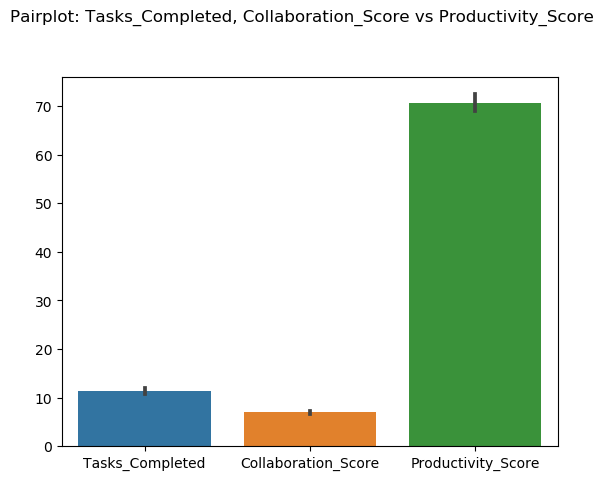

In [27]:

df_clean = dataset[['Tasks_Completed', 'Collaboration_Score', 'Productivity_Score']]

# Create the pairplot
sns.barplot(df_clean)
plt.suptitle('Pairplot: Tasks_Completed, Collaboration_Score vs Productivity_Score', y=1.02)
plt.show()

### ANAVO : Analysis of Variance

### 11. Test the Analysis of Variance between Experience_Years ,Code_Review_Score and Collaboration_Score at signifance level 5%.(Make decision using Hypothesis Testing)

### One way classification


#### Statement: Is there any difference between Experience_Years ,Code_Review_Score and Collaboration_Score


#### Solution:
H0 - There is no significant difference among the statement

H1 - There is a significant difference among the statement

In [28]:
import scipy.stats as stats

stats.f_oneway(dataset['Experience_Years'],dataset['Code_Review_Score'],dataset['Collaboration_Score'])

F_onewayResult(statistic=4.388373272957543, pvalue=0.012824109460560186)

##### Conclusion:

##### pvalue<0.05 - 0.01<0.05 - Reject null hypothesis 
##### For the above stmt H0 is rejected - reject null hypothesis 
##### Hence there is a significant difference between Experience_Years ,Code_Review_Score and Collaboration_Score

### 12. Is there any impact of Programming_Language and Remote_Work on Productivity_Score?

### Two way classification

##### Statement: the impact of Programming_Language and Remote_Work on Productivity_Score

#### Solution:
H0 - There is no significant difference among the statement

H1 - There is a significant difference among the statement

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df=dataset
#df = pd.DataFrame(dataset['gender'],dataset['salary'])
model = ols('Productivity_Score ~ C(Programming_Language) + C(Remote_Work) + C(Programming_Language):C(Remote_Work)', data=df).fit()
anova_results = anova_lm(model, type=2)

In [30]:
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
C(Programming_Language),4.0,1045.732799,261.433200,1.944654,0.104713
C(Remote_Work),1.0,627.592091,627.592091,4.668303,0.031976
C(Programming_Language):C(Remote_Work),4.0,2025.167462,506.291866,3.766019,0.005676
Residual,190.0,25543.007279,134.436880,NaN,NaN


### conclusion

##### pvalue < 0.05 - Reject Null Hypothesis (H0)
##### For the above statement p-value for Programming_Language = 0.104, p-value for Remote_Work = 0.036

##### There is no significnt difference between Programming_Language & Productivity_Score - (Accept Null hypothesis (H0))
##### There is a significant difference between Remote_Work and Productivity_Score bcz pvalue(0.03<0.05), (reject Null hypothesis (H0))
##### The interaction effect between Programming_Language and Remote_Work are statistically significant (p=0.005).